# Bayesian Inference

K. Leighly and A. Kerr 2017

This lecture was drawn from the following sources:
 - G. Richards "Inference2" lecture
 - Ivezic "Week-4-Tue" lecture
 - Ivezic Chapter 5
 - "Data Analysis: a Bayesian Tutorial", D. S. Sivia and J. Skilling

## Outline

 - Bayes' rule recap.
 - Example: Is this a fair coin?
 - Example: The effect of different priors on the fair coin example.
 - Interlude: Philosophy & History
 - Statement on Bayesian Statistical Inference
 - What to do with the Posterior Probability Distribution
 - Example: Gaussian Noise and Averages
 - Example: Data with Different Sized Error Bars
 - Example: $\sigma$ Unknown
 - Marginalization
 - Priors

### Preface

Bayesian and frequentist methods don't just differ in practice, they differ in logic as well.

Consider a suspect in a murder case, Colonel Mustard, out of $n$ total suspects.  If we knew nothing about the case, we might apply a probability of $1/n$ of Mustard being guilty.  However if DNA tests from the crime scene match Mustard's genotype, we will update this probability.

We know Colonel Mustard is either guilty or he's not and this fact doesn't change with DNA test results.  Therefore probabilities correspond to the *belief* that Mustard is guilty.  One way to think of this problem is Colonel Mustard coming with a guilt parameter that is either 0 (certainly innocent) or 1 (certainly guilty).  The initial probabilities were the probabilities for these parameters.

Bayesian statistics uses the same idea: by interpreting probability as a degree of belief, model parameters are viewed as random variables rather than an unknown constant.

Recall Bayes' rule:

$$P(B|A)=\frac{P(A|B)P(B)}{P(A)} \sim P(A|B)P(B).$$

 - $P(A|B)$ is known as the **likelihood**, and can be thought as the probability that the data that you have ($A$) matchs your model ($B$).
 - $P(B)$ is the **prior**, and it can be thought of as additional knowledge that you already have about the model.
 - $P(A)$ is the **evidence**, and as mentioned above, it is sometimes ignored because the posterior can be normalized _a posteriori_.
 - $P(B|A)$ is the **posterior probability**, can be though of as the probabiity of the model given the data, and is what you want.
 
We can write this in words as:
$${\rm Posterior Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}},$$

where we interpret the posterior probability as the probability of the model (including the model parameters).


### The Essence of the Bayesian Method 

The basic premise of the Bayesian method is that probability statements are not limited to data, 
but can be made for model parameters and models themselves. Inferences are made by producing 
probability density functions (pdfs); most notably, **model parameters are treated as random variables**.

Let us illustrate through some examples.

### Example: Is this a fair coin?

Taken from Sivia Chapter 2.

Suppose I told you that I had been to Las Vegas, where I had come across a strange coin:  I observed 4 heads in 11 tosses.  The question is, is it a fair coin?  

Set this problem up as a question about the hypothesis that the coin has a bias H that lies between zero and 1, where $H=0.5$ is a fair coin.

We will be looking for the distribuiton of $H$, which will measure our confidence in the bias of the coin, so that we would expect a fair coin to produce an $H$ strongly peaked at 0.5 if we have a very large number of measurements. In this way, we continue with the idea that H is not an absolute, but something that itself is unknown and decribed by a probability distribution.



It then follows that our inference about the fairness of the coin is summarized by this conditional PDF:

$$P(H|\{data\},I)$$

In other words, the probability that H lies between, say, 0.1 and 0.2, will be $\int_{0.1}^{0.2} P(H|\{data\},I)dH$.



We use Bayes theorem to convert this into a more tractable problem, noting that we are ignoring the denominator and will integrate over that afterwards to make the integrated probability equal to 1:

$$P(H|\{data\},I) \propto P(\{data\}|H,I) \times P(H|I).$$

$P(H|I)$ is the prior PDF. Assuming that we do not know anything about this coin, we assume:

$$P(H|I)= \begin{cases} 1 & 0 \leq H \leq 1, \\ 0 & \mbox{otherwise}.\end{cases} $$

Assuming that the flips of the coin are independent events, the binomial distribution applies:

$$P(\{data\}|H,I) = \binom{N}{R} H^R(1-H)^{N-R}= \frac{N!}{R!(N-R)!} H^R(1-H)^N$$

where $R$ is the number of heads (say) in $N$ tosses. (That this true is easy to see from the multiplicative law of probability and the independence of the tosses.)

So we can do this example, as follows.  In particular, note how the PDF evolves (and with it, our inference about the true bias $H$) as the number of samples increases.



In [1]:
import numpy as np
import scipy.special as special
import matplotlib.pyplot as plt

trials = [0, 1, 2, 3, 4, 5, 10, 100, 1000]
p = 0.3

x = np.linspace(0, 1, 500)

def prior(x):
    return np.ones(x.shape)

def likelihood(x, n, k):
    """Binomial distribution; note the lack of normalization because posteriors can
    be normalized a posteri."""
    return (x**k)*(1-x)**(n-k)

def posterior(x, n, k):
    post = likelihood(x,n,k)*prior(x)
    return post/np.sum(post)*x.shape[0]

def flip():
    
    k = 0
    
    for n in range(max(trials)+1):
        
        if n in trials:
            print('Flips: {}'.format(n))
            print('Heads: {}'.format(k))
            plt.plot(x, posterior(x,n,k))
            plt.show()
        
        a = np.random.uniform()
        if a <= p:
            k += 1

            

Flips: 0
Heads: 0


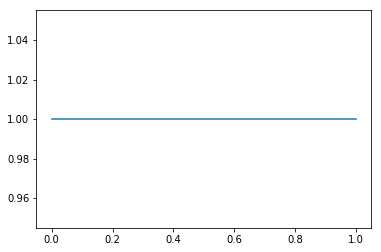

Flips: 1
Heads: 0


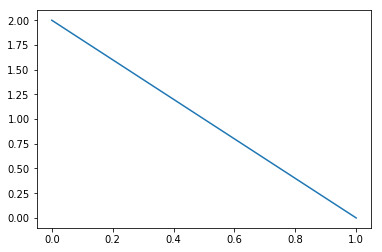

Flips: 2
Heads: 0


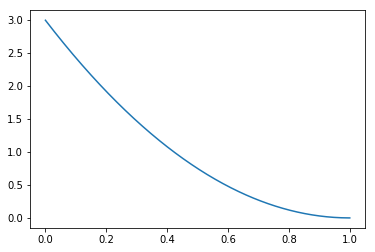

Flips: 3
Heads: 0


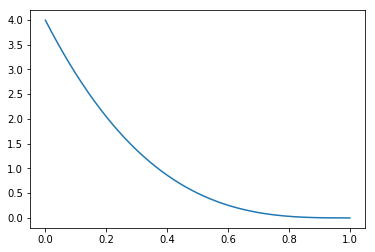

Flips: 4
Heads: 0


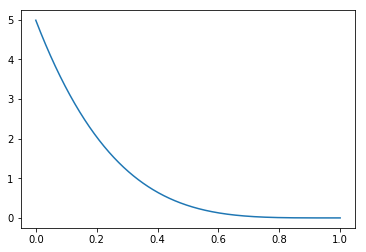

Flips: 5
Heads: 1


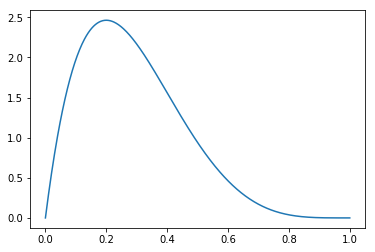

Flips: 10
Heads: 4


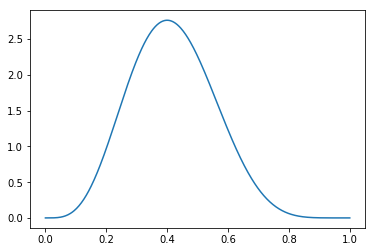

Flips: 100
Heads: 40


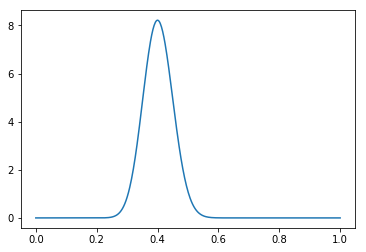

Flips: 1000
Heads: 322


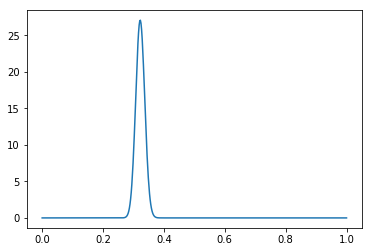

In [2]:
            
flip()

## The effect  of different priors

In the example above, we chose a uniform prior, as it perfectly describes our state of ignorance. What would happen if we had chosen a different prior?

The example below shows the case of two alternative priors, one peaked around 0.5 (e.g., representing the assumption that most coins are fair), and the other is strongly peaked at 0 and 1, i.e., a heavily biased coin. The figure shows that for few tosses, the results are heavily biased by the prior, but for a large number of tosses, the results are identical to the uniform prior.

In addition, the form of the prior influences the estimated PDF in different ways, for few tosses: for the symmetric prior peaked at 0.5, the estimated PDF strongly resembles the prior, while for the prior peaking at 0 and 1, the estimated PDF resembles the result from the uniform prior.

In [3]:
# write different priors

dx = x[1]-x[0]

def gaussian(x, mu, sigma):
    return np.exp(-0.5*((x-mu)/sigma)**2)/sigma/np.sqrt(2*np.pi)

def prior_fair(x):
    """Return a gaussian centered around 0.5"""
    prior = gaussian(x, 0.5, .1)
    return prior/np.sum(prior)/dx

def prior_0(x):
    """Return a gaussian centered around 0."""
    prior = gaussian(x, 0., .1)
    return prior/np.sum(prior)/dx

def prior_1(x):
    prior = gaussian(x, 1., .2)
    return prior/np.sum(prior)/dx


# rewrite flip to allow variable priors
def posterior(x, n, k):
    post = likelihood(x,n,k)*prior_0(x)
    return post/np.sum(post)/dx

def flip():
    
    k = 0
    
    for n in range(max(trials)+1):
        
        if n in trials:
            print('Flips: {}'.format(n))
            print('Heads: {}'.format(k))
            plt.plot(x, posterior(x,n,k))
            plt.show()
        
        a = np.random.uniform()
        if a <= p:
            k += 1

Flips: 0
Heads: 0


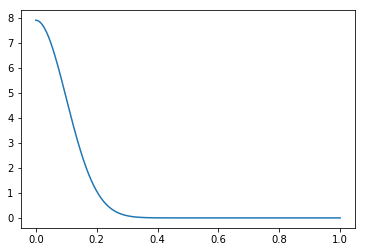

Flips: 1
Heads: 1


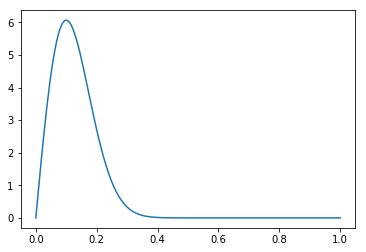

Flips: 2
Heads: 1


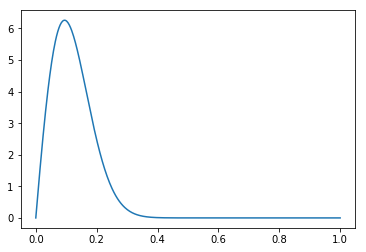

Flips: 3
Heads: 1


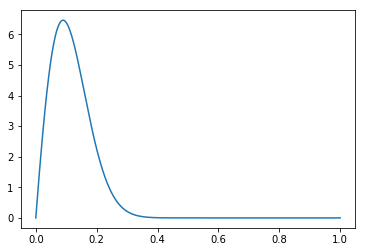

Flips: 4
Heads: 1


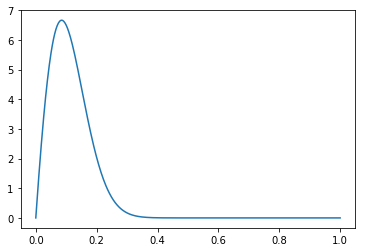

Flips: 5
Heads: 1


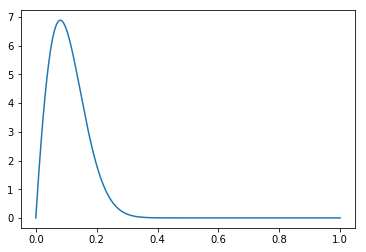

Flips: 10
Heads: 3


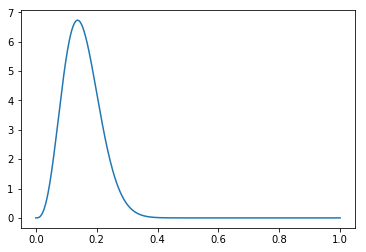

Flips: 100
Heads: 28


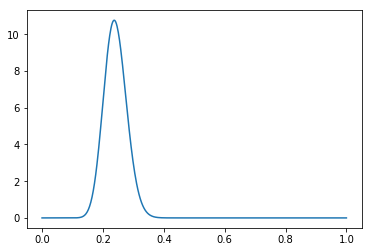

Flips: 1000
Heads: 290


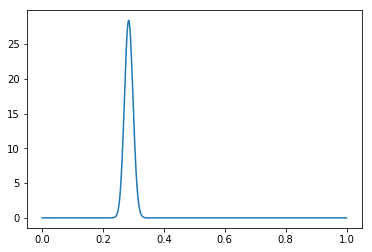

In [4]:
# switch out prior function in posterior before you call

flip()

##  Interlude - Philosophy and History

We can see from these simple examples that implementing Bayes' rule gives a powerful method for taking into account prior knowledge.  Otherwise, it doesn't seem to be that much different from what we have done before.  And in some ways, that is true: in both the frequentist approach and the Bayesian approach, the likelihood (the probability of the data given the model) is an important part of the analysis.  

There are also some interesting philosophical differences as well.  The likelihood and the frequentist approach is understood to be completely appliable to the long-term probability of observing some repeatable event, like the probability of obtaining heads.

But in science, we often have only one instance of a thing, e.g., the mass of a particular planet.  In that case, the Bayesian approach arguably makes more sense, since it yields a measure in your belief that the inferred result is correct.  

It can also be argued that the Bayesian posterior is closer to what we want to determine in science, i.e., the probability that a given model is correct given the data that you have, and any prior knowledge.



If a Bayesian approach makes more sense, then why do we learn the frequentist approach in school?  

There are many answers to this question.  A common one these days is that in many cases, the posterior probability distribution can't be evaluated analytically, and so we couldn't really use a Bayesian approach until computers were powerful enough to do that.  But that doesn't explain the ["Bayesian Revolution"](https://www.nytimes.com/2014/09/30/science/the-odds-continually-updated.html?) that has seen an explosion in this technique over the past 15 years or so: although computers are more powerful and cheaper than ever, we did have powerful computers in the 20th century.  

An interesting and readable discussion is contained in ["The Theory that Would Not Die"](https://www.amazon.com/Theory-That-Would-Not-Die-ebook/dp/B0050QB3EQ/ref=sr_1_1?ie=UTF8&qid=1504455374&sr=8-1&keywords=the+theory+that+would+not+die+how+bayes%27+rule+cracked).  Basically, this book presents the idea that a combination of powerful personalities (Fisher, in particular), and the fact that Bayesian statistics was used in wartime applications, which led to the advances being classified, resulted in a lag in Bayesian applications that is only now being rectified.

## Bayesian Statistical Inference

Up to now we have been computing the **likelihood** $p(D\,|\,M)$.  In Bayesian inference, we instead evaluate the **posterior probability** taking into account **prior** information.

Recall that Bayes' Rule is:
$$p(M\,|\,D) = \frac{p(D\,|\,M)\,p(M)}{p(D)},$$
where $D$ is for data and $M$ is for model. Or in words, 
$${\rm Posterior \,\, Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}}.$$

If we explicitly recognize prior information, $I$, and the model parameters, $\theta$, then we can write:
$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)},$$
where we will omit the explict dependence on $\theta$ by writing $M$ instead of $M,\theta$ where appropriate.  However, as the prior can be expanded to 
$$p(M,\theta\,|\,I) = p(\theta\,|\,M,I)\,p(M\,|\,I),$$
it will still appear in the term $p(\theta\,|\,M,I)$.

Note that it is often the case that $p(D\,|\,I)$ is not evaluated explictly since the posterior probability 
can be (re)normalized. 

**The Bayesian Statistical Inference process** is then
* formulate the likelihood, $p(D\,|\,M,\theta,I)$
* chose a prior$^1$, $p(M,\theta\,|\,I)$, which incorporates *other information beyond the data in $D$*
* determine the posterior pdf, $p(M,\theta \,|\,D,I)$
* search for the model parameters that maximize $p(M,\theta \,|\,D,I)$ - we will discuss this momentarily.
* quantify the uncertainty of the model parameter estimates - we will discuss this momentarily too.
 
$^1$: Note that $p(M,\theta\,|\,I) = p(\theta\,|\,M, I)\, p(M\,|\,I)$.  

Going back to our bus arrival problem, our unknown model parameter is $\tau$ and data is $t$, so that 
$$p(\tau\,|\,t,I) = p(t\,|\,\tau) \, p(\tau\,|\,I).$$

Before applying this expression, we need to discuss how to choose priors, here $p(\tau\,|\,I)$.

## What to do with the Posterior Probability Distribution?

The result of our analysis is the posterior probability distribution.   That has all the information about the problem.  But sometimes one wants to summarize the result (e.g., in a table) by two numbers: the point best estimate, and its _reliability_.

Well, this is mostly based on what we already know.  But there is some ambiguity because the point estimate is not part of Bayes' Rule, so how to best characterize it can be debated.



### MAP

Let the quantity of interest be denoted $X$, with a posterior PDF $P=P(X\vert \{data\},I)$.

Then the best estimate, denoted $X_0$ is given by the condition:

$$\frac{dP}{dX}\lvert_{X_0}=0$$

i.e., the maximum of the PDF. (In principal one should use the second derivative to be sure that $X_0$ is a maximum rather than a minimum.)  This is called the _maximum a posteriori_ (MAP) estimate.

### Posterior Mean

Another natural choice is the _posterior mean_:

$$\bar \theta = \int \theta p(\theta | D) d\theta,$$

where $\theta$ is one of the model parameters, and $D$ is the data. $p(\theta | D)$ is obtained from the full posterior $p(M,\mathbf{\Theta} | D, I)$, where $\mathbf{\Theta}$ denotes all the model parameters, using _marginalization_.  We will discuss marginalization further below.

### Credible regions

The width or spread of the distribution is used to characterize the reliability of the estimate. As with the point estimate, there are a number of ways to estimate this.  First, we can look at a method that looks very much like MLE.


It turns out that it is easier to work with the logarithm of the PDF:

$$L=\log_e[P(X|\{data\},I)].$$

Then, it is also helpful to expand L in a Taylor series around $X=X_0$:

$$L=L(X_0)+\frac{1}{2} \frac{d^2L}{dX^2}|_{X_0} (X-X_0)^2+\dotsc,$$

where the best estimate of $X$ is also given by:

$$\frac{dL}{dX}|_{X_0}=0,$$

which is equivalent to the result above because $L$ is a monotonic function of $P$.

The first term in the expansion is constant, gives no information, and can be dropped. So the likelihood is dominated by the quadratic term in determining the width of the posterior of the PDF (after taking the exponential):

$$prob(X|\{data\},I) \sim A \exp \left[ \frac{1}{2} \frac{d^2L}{dX^2} \lvert_{X_0} (X-X_0)^2 \right]$$

where the $\sim$ and the $A$ denote that this PDF will have to be normalized. This is a normal distribution which we have previously written as

$$prob(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left[-\frac{(x-\mu)^2}{2\sigma^2} \right].$$

This function is, of course, characterized by the mean $\mu$ and the standard deviation $\sigma$, where it can be shown that

$$\sigma=\left(-\frac{d^2L}{dX^2}|_{X_0}\right)^{-1/2}.$$

Notice what we have done here. We have taken a (basically) arbitrary probability density function, Taylor-expanded it about the peak, and thrown away higher orders. This basically turned the PDF in to a normal distribution, which is characterized by the mean $\mu$ and the standard deviation $\sigma$.

## Example:

Return to the coin experiment as an application of this analysis. We have the binomial distribution
$$prob(H|\{data\}),I) \propto H^R (1-H)^{N-R},$$
where $0 \leq H\leq 1$.

Let's get the log likelihood to find the properties of the distribution:

$$ L = constant + R\log_e(H) + (N-R) \log_e(1-H).$$

Obtain the best estimate of $H$ and its error bar from the first and second derivatives:

$$\frac{dL}{dH} = \frac{R}{H}-\frac{(N-R)}{(1-H)}$$
$$\frac{d^2L}{dH^2} = -\frac{R}{H^2} - \frac{(N-R)}{(1-H)^2}.$$

Find the maximum by setting the first derivative equal to zero and solving for $H_0$ yields

$$H_0=\frac{R}{N}.$$

The error bar is then equal to the second derivative evaluated at $H=H_0$, yielding:

$$\sigma=\sqrt{\frac{H_0(1-H_0)}{N}}.$$

Note that the width of the PDF decreases proportional to the square root of $N$, the number of samples.

These are the theoretical mean and $\sigma$ discussed in Lecture 3.

### What if the posterior is asymmetric?


How can you characterize data when the PDF is asymmetric? As discussed above, a good way might be to characterize the most representative value as the weighted mean, i.e, $E\{X\}$:

$$\langle X \rangle = \int X prob(X|\{data\},I) dX.$$

The error is even less well defined but might be understood to be the limits that, say, 95% of the probability density lies between.



## Example: Gaussian Noise and Averages

Now we will commence to work a series of examples of increasing complexity where various parts of the data sets are drawn from normal distributions.  First, consider the ubiquitous experiment: you have a set of $N$ measurements $\{x_k\}$ of the length of a rod. The measurement errors are Gaussian, and we assume that they are known, and they are the same (homoscedastic errors). So the probability of the $k$th point having a value of $x_k$ (i.e., the likelihood) is

$$prob(x_k | \mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left[ -\frac{(x_k-\mu)^2}{2\sigma^2}\right],$$

where $\mu$ is the true value of the parameter of interest, and $\sigma$ is the measure of the error in its measurement.  _For this example, $\sigma$ is known._

The question then is, given the data $\{x_k\}$, what is the best estimate of $\mu$ and how confident are we in this prediction?

From the Bayesian standpoint, what we need to evaluate is the posterior pdf $prob(\mu ) |\{x_k\},\sigma,I)$, i.e., the conditional probability that $\mu$ attains a certain value, given the data $\{x_k\}$, the uncertainty $\sigma$, and any prior knowledge $I$. By Bayes theorem:

$$prob(\mu|\{x_k\},\sigma,I) \propto prob(\{x_k\}|\mu,\sigma,I) \times prob(\mu|\sigma,I).$$

If the measurements are independent, then the probability of the set of measurements $\{x_k\}$ is the product of the probability of each individual measurement (by the product rule):

$$prob(\{x_k\} | \mu,\sigma,I) = \prod_{k=1}^{N} prob(x_k | \mu,\sigma,I).$$

For the prior, a simple uniform PDF is used (noting that the value of the standard deviation gives no information about the mean)

$$prob(\mu|\sigma,I) = prob(\mu|I)=\begin{cases} A & \mu_{min} \leq \mu \leq \mu_{max}, \\ 0 & \mbox{otherwise}, \end{cases} $$

where the constant $A$ is given by the reciprocal of the range $\mu_{max}-\mu_{min}$.

Substituting in for the probability of a single $x_k$ having a mean of $\mu$ (recall in this case we are assuming that the data are drawn from the normal distribution), we get a logarithm of the posterior likelihood $L$

$$L = \log_e[prob(\mu|\{x_k\},\sigma,I)] $$
$$= constant-\sum_{k=1}^N \frac{(x_k-\mu)^2}{2\sigma^2}.$$

As above, to find the best estimate of $\mu$, we differentiate with respect to $\mu$ and set the derivative equal to zero:

$$\frac{dL}{d\mu}|_{\mu_0} = \sum_{k=1}^{N} \frac{x_k-\mu_0}{\sigma^2}
= 0.$$

For this case, $\sigma$ is a constant independent of $k$, so the equation can be rearranged as follows:

$$\sum_{k=1}^{N} x_k = \sum_{k=1}^N \mu_0 = N\mu_0.$$

Therefore, the best estimate of $\mu$ is the average of the set of $\{x_k\}$:

$$\mu_0=\frac{1}{N} \sum_{k=1}^{N} x_k.$$

For the best estimate of the uncertainty in $\mu_0$, we use the second derivative of $L$, as above:

$$\frac{d^2L}{d\mu^2}|_{\mu_0} = - \sum_{k=1}^{N} \frac{1}{\sigma^2} = -\frac{N}{\sigma^2}.$$

As above, the uncertainty we are looking for is 1 over the square root of this value, so

$$\mu = \mu_0 \pm \frac{\sigma}{\sqrt{N}}.$$

This is the familiar result that we know so well. (And which we have already derived in this class - but it is so fundamental that it bears repeating.)

Note some important features of this derivation:

When we examined the likelihood above, we used a Taylor expansion and dropped higher-order terms. This result, however, is exact, because higher order derivatives of the log Gaussian are equal to zero.


Also, the prior didn't appear explicitly in the analysis. (It was gathered into the constant in the equation above.) But whether or not it will appear depends on how the $\mu_{min}$ and $\mu_{max}$ are related to the width of the resulting posterior. If the prior knowledge tells us that the values outside of this range are not allowed, the posterior would be modified by the range (and the best estimate and uncertainty in the estimate would change.

##  Example: Data with different-sized error bars

A more general case occurs when the error bar on each point is allowed to be different, i.e., we have $\{\sigma_k\}$ as well as $\{x_k\}$. Now, the probability of the kth datum having a value of $x_k$ is (assuming that the uncertainties are distributed normally):

$$prob(x_k | \mu,\sigma_k) = \frac{1}{\sigma_k \sqrt{2\pi}} \exp
\left[-\frac{(x_k-\mu)^2}{2\sigma_k^2}\right].$$

Following the same procedure, the logarithm of the posterior probability is:

$$L=\log_e[prob(\mu|\{x_k\},\{\sigma_k\},I)] = constant -
\sum_{k=1}^{N}\frac{(x_k-\mu)^2}{2 \sigma_k^2}.$$

The same procedure is followed to find

$$\mu_0 = \sum_{k=1}^N w_k x_k / \sum_{k=1}^N w_k, \mbox{where}\, w_k =
\frac{1}{\sigma_k^2},$$

i.e., now the best estimate of the mean is given by a weighted average. Similarly, the second derivative yields the error bar, and now the best estimate and error for $\mu$ is

$$\mu = \mu_0 \pm \left(\sum_{k=1}^{N} w_k \right)^{-1/2}.$$



Comments: A key conclusion is that the posterior PDF for $\mu$ is Gaussian in cases when $\sigma_k$ are known, regardless of the data set size $N$.

Why is $N$ important in the statement above? It is because of the central limit theorem, discussed, for example, in Section 3.4 in the Ivezic book. Quoting from there: "Given an arbitrary distribution $h(x)$, characterized by its mean $\mu$ and standard deviation $\sigma$, the central limit theorem states that the mean of $N$ values $x_i$ drawn from that distribution will approximately follow a Gaussian distribution $N(\mu,\sigma/\sqrt{N}$, with the approximation accuracy improving with $N$." We have already experienced this result with the coin-toss experiment from Sivia Fig. 2.1. See the Ivezic section for some discussion and examples.  A proof of the central limit theorem can be found here, and here is a little video that explains the central limit theorem and its importance, and gives an example.

## Example: $\sigma$ is unknown

In the next example we have a set of $N$ values drawn from a Gaussian distribution $N(\mu,\sigma)$, but now both the mean and the $\sigma$ are to be determined from the data distribution.  This a physical analog to this problem would be measuring the position and width of a spectral line (ignoring the normalization, for the momement).  

We don't have, in this case, any errors on the data (those will be added in the next example). So now, the posterior PDF that we seek is a function of two variables: $prob(\mu,\sigma | \{x_k\},I)$. Generally, we would be inclined to do the following:

$$\bar{x}=\frac{1}{N} \sum_{i=1}^N x_i$$
and

$$\sigma = \sqrt{\frac{1}{1-N} \sum_{i=1}^{N} (x_i-\bar{x})^2}$$

but now we want to consider the example where $N$ is not so large that these will apply. Apparently, when $N$ is not large, the posterior PDF for $\mu$ follows the Student's t distribution (defined and discussed in Ivezic 3.3.8).


Since each measurement is assumed to follow a Gaussian distribution, we can write the probability of the set of observations as:

$$p(\{x_i\}| \mu, \sigma, I)=\prod_{i=1}^N \frac{1}{\sqrt{2 \pi } \sigma} \exp \left(\frac{-(x_i-\mu)^2}{2 \sigma^2}\right). $$

Again, we will be estimating both $\mu$ and $\sigma$, so the posterior probability distribution will be a function of two parameters.

A uniform prior distribution is chosen for $\mu$, and a uniform prior distribution $\log_e \sigma$. We will assume this logarithmic dependence for now, and justify it later (and we will have a lot more to say about priors below). At any rate, it is stated that the exact value of the prior isn't going to matter, as long as it doesn't truncate the distribution severely. So:

$$p(\mu,\sigma|I) \propto \frac{1}{\sigma}$$

for $\mu_{min}\leq \mu \leq \mu_{max}$ and $\sigma_{min} \leq \sigma \leq \sigma_{max}.$

While in many cases, we can ignore the normalization, and normalize later, here the PDF is normalized explicitly:

$$p(\{x_i\} | \mu,\sigma,I) = C \frac{1}{\sigma^{(N+1)}} \prod_{i=1}^N \exp (\frac{-(x_i-\mu)^2}{2 \sigma^2}), $$

where
$$C=(2\pi)^{-N/2} (\mu_{max}-\mu_{min})^{-1} [\log_e (\frac{\sigma_{max}}{\sigma_{min}})]^{-1}.$$



The product of these two yields, by Bayes' rule, what we want, which is $p(\mu,\sigma | \{x_i\},I)$, i.e., we want the probability of both $\mu$ and $\sigma$. And so, as usual, we take the logarithm to get the likelihood:

$$L=\log_e[p(\mu,\sigma | \{x_i\},I)]$$
$$ = constant-(N+1)\log_e \sigma -\sum_{i=1}^N \frac{(x_i-\mu)^2}{2 \sigma^2}.$$

Now, noting that $\bar{x}=\sum x_i/N$, the following equality is used:

$$\sum_{i=1}^N (x_i - \mu)^2 = N(\bar{x}-\mu)^2 + \sum_{i=1}^N (x_i-\bar{x})^2. $$

Let $V=N^{-1}\sum_{i=1}^N (x_i-\bar{x})^2$. Substitute this into the equation for the likelihood:

$$L_p = constant - (N+1)\log_e \sigma - \frac{N}{2\sigma^2} ((\bar{x}-\mu)^2 + V).$$

Now we have cast the likelihood in terms of factors that we can evaluate, namely, $N$, $\bar{x}$ (the simple average of $\{x_i\}$, and $V$, which is a function of $\bar{x}$, $N$, and $\{x_i\}$.



A plot of this likelihood is generated below, using the code from the astroml webpage, for $N=10$, $\bar{x}=1$, and $V=4$.  

Note to execute this cell, you'll have to have the astroml package installed. 

In addition,  it is noted that some users have trouble with "usetex", so if the plot doesn't work, try changing  `usetex=True` to `usetex=False`.  

Try changing the values of $(N,\overline{x},V)$. 



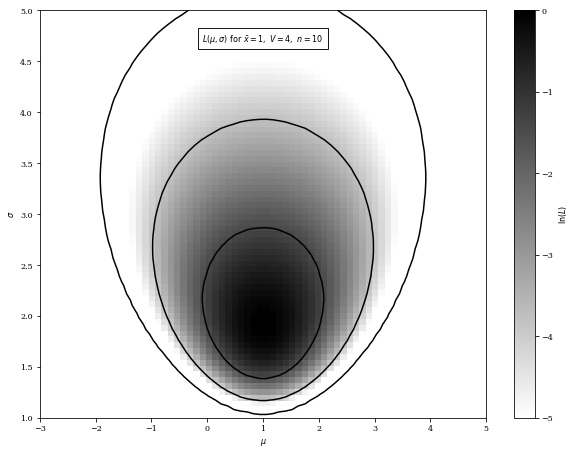

In [5]:
# %load code/fig_likelihood_gaussian.py
"""
Log-likelihood for Gaussian Distribution
----------------------------------------
Figure5.4
An illustration of the logarithm of the posterior probability density
function for :math:`\mu` and :math:`\sigma`, :math:`L_p(\mu,\sigma)`
(see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1,
and V = 4. The maximum of :math:`L_p` is renormalized to 0, and color coded as
shown in the legend. The maximum value of :math:`L_p` is at :math:`\mu_0 = 1.0`
and :math:`\sigma_0 = 1.8`. The contours enclose the regions that contain
0.683, 0.955, and 0.997 of the cumulative (integrated) posterior probability.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import scipy.stats
from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\ln(L)$')
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.show()

In [6]:
plt.show()


This plot is symmetric around $\mu=1$, so the maximum value of $L$ is found along $\mu=\mu_0=\bar{x}$. This is the same result obtained from Maximum Likelihood Estimation (MLE) described in Ivezic 4.2.

But more formally, what we want to do is to "marginalize" (more on this concept later) by integrating over all possible values of $\sigma$ at each value of $\mu$, i.e.,

$$p(\mu | \{x_i\}, I) = \int_{0}^{\infty} p(\mu,\sigma |\{x_i\}, I),
d\sigma,$$

which yields

$$p(\mu \vert x_i,I) \propto \left[ 1+\frac{(\bar{x}-\mu)^2}{V}\right]^{-N/2}.$$

The posterior marginal PDF for $N=10$, $\bar{x}=1$, and $V=4$ is shown below.

The top panels of the figure below (textbook figure 5.5, for the code see astroML website) show marginal distributions p(μ) and p(σ). The solid line is analytic Bayesian result with uninformative prior and the dotted line is the result for a uniform prior (note that there is not that much difference). The dashed line is the MLE result, which is quite different. The bottom panels show the cumulative distributions.

![Ivezic, Figure 5.5](http://www.astroml.org/_images/fig_posterior_gaussian_1.png)


Similarly, we can get the pdf for $\sigma$ by integrating over $\mu$:

$$P(\sigma|\{x_i\},I) = \int_{0}^{\infty} p(\mu,\sigma | \{x_i\}, I)
d\mu,$$

yielding

$$p(\sigma |\{x_i\},I) \propto \frac{1}{\sigma^N}
\exp \left(\frac{-NV}{2\sigma^2}\right).$$

This probability distribution function is shown in the figure above. Unlike the Gaussian approximation, it is highly skewed.

**Comment:** As pointed out in the Ivezic book, the skewness of the estimate for $\sigma$ can have large consequences on the interpretation of data. They use the example of a subsample of 10 stars from the Milky Way halow that have a measured velocity dispersion of $50\, \rm  km s^{-1}$. Using the Gaussian hypothesis, we would reject the hypothesis that these stars were typical Milky Way halo stars (which have a velocity dispersion of $85\,  \rm km\, s^{-1}$ at a highly significant level, and therefore might be a stellar stream from perhaps a tidally disrupted dwarf or whatever. But our analysis here shows that for $N=10$, the estimate of $\sigma$ is so skew that a value of $85\,  \rm km\, s^{-1}$ cannot be rejected even at a 2$\sigma$ confidence level. In addition, embarassingly, the classical approach would allow for negative $\sigma$.


### Gaussian distribution with Gaussian errors

Now we will assume that $\sigma$ is unknown, as above, but there are also errors on the data. Please work through this example yourself; it is found on pages 202-206 of the Ivezic book.

## Marginalization

In the previous examples, we have only looked at the case where we were interested in the values of all the parameters (one or two) that were estimated. In order to motivate marginalization, we will use the example of estimating the amplitude of a signal in the presence of a background. We are interested in the value of the signal, but not interested in the background - it is a nuisance parameter. The discussion follows Sivia chapter 3.

Examples of situations in which there are signals and background abound. For example, in X-ray diffraction from a sample, the data willl contain the Bragg peaks of interest, as well as a background of diffuse scattered light. Astronomical photometry or image analysis involves rejection of a background (really, a foreground).

Consider Sivia Fig. 3.1, reproduced below, where the X-axis is the measurement variable (e.g., wavelength) and the y-axis is amplitude. The background is assumed to be flat, and of unknown magnitude B, and the signal has a known shape (Gaussian with known width) and position ($x=x_0$) and unknown amplitude A. Given the spectrum, i.e., the set of counts $\{N_k\}$ measured at experimental settings $\{x_k\}$, the question is, what is the best estimate of the signal peak and the background?

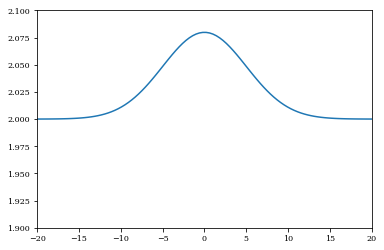

In [7]:
def peak_and_bg(x):
    return 2 + gaussian(x, 0, 5)

x = np.linspace(-20, 20, 100)
plt.plot(x, peak_and_bg(x))
plt.axis([-20, 20, 1.9, 2.1])
plt.show()

Given what we know, it is reasonable to assume that the datum $D_k$ can be described by:

$$ D_k=n_0 \left[A \exp \left[-\frac{(x_k-x_0)^2}{2w^2}\right] + B \right],$$

where $n_0$ is a normalization constant related to the integration time (for example).

In this case, we are talking about photon counting, so we will use the Poisson distribution:

$$prob(N|D) = \frac{D^N e^{-D}}{N!},$$

where the expected number of counts is $D$ ($\mu$ in the figure below), and the number observed is $N$.

Note that the expectation value for the Poission distribution is:

$$\langle N\rangle = \sum_{N=0}^{\infty} N prob (N|D) = D.$$

So, we set up our probability of observing an individual data point $N_k$, given the model specified by $A$ and $B$, and the prior $I$ (which contains information such as the known shape of the signal, the width of the signal $w$, and the exposure parameter $n_0$ is

$$prob(N_k | A,B,I) = \frac{D_k^{N_k} e^{-D_k}}{N_k!},$$

If the data are independent, we can write the probability of observing the set of data (i.e., the whole spectrum $\{N_k\}$ as:

$$prob(\{N_k\}|A,B,I) = \prod_{k=1}^{M} prob (N_k|A,B,I),$$

where there are $M$ points in the spectrum.

What we want is the posterior PDF $prob(A,B|\{N_k\},I)$, and so Bayes theorem gives us

$$prob(A,B|\{N_k\},I) \propto prob(\{N_k\} | A,B,I) \times
prob(A,B|I).$$

For the prior, let us assume constant values, greater than or equal to zero:

$$prob(A,B | I) = \begin{cases} \mbox{constant} & \mbox{for } A\ge 0
\mbox{ and } B \ge 0, \\ 0 & \mbox{otherwise}. \end{cases} $$

Implicit here are upper bounds on $A$ and $B$; we won't specify them explicitly, but will assume that they don't cut off the PDF.

Multiplying the PDFs for the set of $\{N_k\}$ and for the prior, and taking the log of the result yields:

$$L=\log_e[prob(A,B|\{N_k\},I)]$$
$$=constant + \sum_{k=1}^{M}[N_k \log_e(D_k)-D_k].$$

The results are shown below.

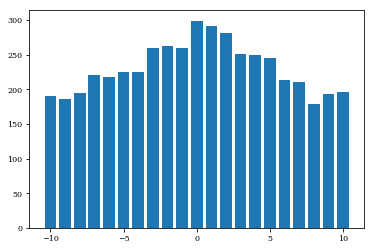

In [8]:
%matplotlib inline

def dk(xk, A, B, x0=0, w=3, n0=100):
    return n0*(A*np.exp(-0.5*((xk-x0)/w)**2) + B)

xk = np.arange(-10, 11)

def generate_data():
    
    dks = dk(xk, 1, 2)
    
    nks = np.random.poisson(dks)
    
    plt.bar(xk, nks)
    
    return nks
    
Nk = generate_data()

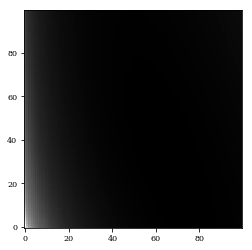

In [25]:
def log_posterior(a,b):
    if a+b < 1e-6:
        return -1e-6
    Dk = dk(xk, a, b)
    return np.sum(Nk*np.log(Dk) - Dk)

n_samples = 100
As = np.linspace(0, 3, n_samples)
Bs = np.linspace(0, 3, n_samples)

post_grid = np.zeros((n_samples, n_samples))

for i, a in enumerate(As):
    
    for j, b in enumerate(Bs):
        
        post_grid[i,j] = log_posterior(a,b)

# post_grid -= np.max(post_grid)
plt.imshow(post_grid, origin='lower',
          cmap='Greys')
plt.show()

In [26]:
# find maximum
max_val = np.max(post_grid)
max_ind = np.argmax(post_grid)
print(post_grid.shape)

print(max_ind)

(100, 100)
3165


In [27]:
#plot contours



In [28]:
#finding

B_2d, A_2d = np.meshgrid(As, Bs)

print(A_2d.shape)

A_2d = A_2d.flatten()
B_2d = B_2d.flatten()

print(A_2d.shape)

A_best = A_2d[max_ind]
B_best = B_2d[max_ind]

print(A_best, B_best)

(100, 100)
(10000,)
0.939393939394 1.9696969697


We see that the maximum of the log posterior corresponds to the parameters used to generate the data.  This is what we hoped!

Now for a recreation of the plot in Sivia Figure 3.3.

[0, 3, 0, 3]

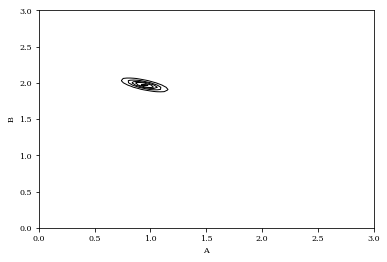

In [29]:
# plot contours at 90%, 70%, etc. of the maximum probability
levels = np.log(np.array([.1, .3, .5, .7, .9]))+max_val

X, Y = np.meshgrid(Bs, As)
CS = plt.contour(Y, X, post_grid, levels, colors='k', linewidths=1)
plt.xlabel('A')
plt.ylabel('B')
plt.axis([0, 3, 0, 3])

Example results are shown in Fig 3.3 of Sivia. The simulated data were generated using a Poission random number generator, from the model given above, i.e., a Gaussian peak with known position $x_0=0$ and width $w=5$, but unknown ampitude and (constant) background
amplitude. 

The left hand side shows the data, and the right side shows the posterior PDF contours which are functions of the amplitude of the signal $A$ and the amplitude of the background $B$. The contours show 10%, 30%, 50%, 70% and 90% of the maximum probability
(note the distinction between this method and the one used on the previous example, which normalized according to the cumulative probability).



Now that we have set up the problem, we discuss marginalization. The fact is that for our experiment, we are not interested in the actual value of the background normalization $B$; we are only interested in the value of signal normalization $A$. So what we really want is $prob(A|\{N_k\},I)$. This is simply obtained by integrating the joint probability distribution with respect to $B$:

$$prob(A|\{N_k\},I)=\int_{0}^{\infty} prob(A,B|{N_k},I) dB.$$

Similarly, it would be possible to estimate the PDF of the background only by marginalizing over $A$.

Sivia Fig. 3.4 yields the marginal distributions from Fig 3.3.

It is worth emphasizing that the probability distribution of A resulting from marginalizing over $B$, $prob(A|\{N_k\},I)$, is quite different from the probability distribution of $A$ conditional on $B$, $prob(A|\{N_k\},B,I)$. 

As pointed out by Sivia, these correspond to different experiments. 
- The first is the experiment where both $A$ and $B$ are unknown and are determined via the joint probability distribution $P(A,B)$. 
- The second is the case where you may have the same data, but you already have information (perhaps from a separate calibration experiment) about $B$. 

Figure 3.4 from Sivia shows the conditional probability distribution assuming that it is known that $B=2$. It can be seen in the figure that the probability distribution for $A$ is similar for both cases, except for the case where the bandpass is truncated so that it is difficult to distinguish the data from the background.

In [30]:
print(post_grid)

[[ -1.00000000e-06   5.31226870e+03   8.60970302e+03 ...,   2.13859513e+04
    2.13720487e+04   2.13576412e+04]
 [ -3.33898360e+03   6.79219104e+03   9.43433582e+03 ...,   2.13835218e+04
    2.13694123e+04   2.13548021e+04]
 [ -6.90472454e-01   7.76970732e+03   1.00668478e+04 ...,   2.13809408e+04
    2.13666275e+04   2.13518176e+04]
 ..., 
 [  1.66571448e+04   1.76086063e+04   1.81309098e+04 ...,   2.06792286e+04
    2.06532804e+04   2.06270246e+04]
 [  1.66841011e+04   1.76283441e+04   1.81476911e+04 ...,   2.06685729e+04
    2.06425484e+04   2.06162173e+04]
 [  1.67105524e+04   1.76476892e+04   1.81641181e+04 ...,   2.06578696e+04
    2.06317693e+04   2.06053634e+04]]


In [47]:
# we need to make the log posterior values numerically sound...
# this is a hackey way to do it, but we'll subtract a fixed value
# from every term to make them of order unity.  Then turn the infinity value
# into a really negative finite value

new_grid = post_grid - np.max(post_grid) + 3

print(np.max(post_grid))
print(np.argmax(post_grid))

print(new_grid)

24927.3989868
3165
[[-21585.41538987 -16273.1466862  -12975.7123713  ...,   -199.46406053
    -213.36665485   -227.77416926]
 [-24924.39898677 -14793.22434388 -12151.07957258 ...,   -201.89363142
    -216.00308934   -230.61330356]
 [-21586.10586132 -13815.70806666 -11518.56758207 ...,   -204.47459419
    -218.78786732   -233.59782415]
 ..., 
 [ -4928.27054881  -3976.80911717  -3454.50562437 ...,   -906.18681502
    -932.13497731   -958.39081042]
 [ -4901.31433259  -3957.07124511  -3437.72429123 ...,   -916.84246599
    -942.86696243   -969.19813548]
 [ -4874.86303645  -3937.72616999  -3421.29727551 ...,   -927.54579207
    -953.64606482   -980.05202993]]


In [64]:
# looking for amplitudes by marginalizing data

#post grid is our data array

samples=100

As = np.linspace(0, 3., samples)
Bs = np.linspace(0, 3, samples)
da = As[1] - As[0]



def p_A():
    
    #for every value of A, sum the corresponding column of B's
    p = np.zeros(len(As))
    
    for index in range(len(As)):
        
        p_AB = np.exp(new_grid[index, :])
        p[index] = np.sum(p_AB)
        
    return p/np.sum(p)/da

def p_B():

    p = np.zeros(len(Bs))
    
    for index in range(len(Bs)):
        
        p_AB = np.exp(new_grid[:, index])
        p[index] = np.sum(p_AB)
        
    return p/np.sum(p)/da

def find_a1():
    
    exp_a1 = 0
    for a1 in a1s:
        exp_a1 += a1*p_a1(a1, x)
        
    return exp_a1

Get the marginalized probabilities and calculate expectation values.

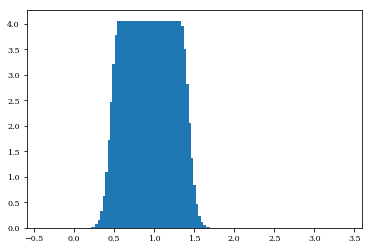

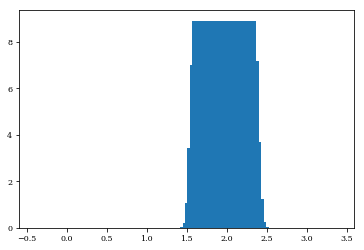

0.946917260986 1.97106708566


In [71]:
plt.bar(As, p_A())
plt.show()


plt.bar(Bs, p_B())
plt.show()

A_avg = np.sum(np.asarray(As)*p_A())*da
B_avg = np.sum(np.asarray(Bs)*p_B())*da

print(A_avg, B_avg)

## Assignment of Probabilities and Priors

We need to think about how to set probabilities, as we will need those both for the priors and for the probability of the data given the model.  To motivate this section, I briefly discuss an example given in Ivezic 5.5 where priors really matter.

The situation is illustrated in the figure below. An observable quantity with true values $x_{true}$ is measured for a subsample with a true distribution $h(x_{true})$. The measurements are affected by a known error distribution $e(x_{obs}|x_{true})$, where $x_{obs}$ are the measured values. When $h(x_{true})$ is nonuniform and measurement errors are not negligible, the distribution of $x_{obs}$ can be substantially different from the distribution of $x_{true}$.

![Ivezic, Figure 5.2](http://www.astroml.org/_images/fig_malmquist_bias_1.png)

One way to understand these biases is to think about the experiment of observing a flux-limited sample. A flux-limited sample gathers all the objects down to a certain flux. An example is the ROSAT All Sky Survey.  

- Generally speaking, there are more faint objects than bright objects, so the intrinsic population distribution is steep. 
- In addition, AGN are variable. 

So consider an AGN which has an average brightness just below the flux cutoff. 
 - If it happens to be bright when observed, it will be counted. 
 - Likewise, an AGN which has an average brightness just above the flux cutoff, would not be detected during the survey if it happens to have a flux lower than average at that time.  
 
So some faint objects will be counted that should not have, and some bright objects will not be counted that should have.   But because of the steep population distribution, more faint objects will be scattered _into_ the sample than bright objects scattered out (because there are more faint objects).   Not only will the sample distribution be skewed from the population distribution, but chances are that if you observe an object near the cutoff again, it will be fainter than its discovery observation.

The rest of this example can be seen in Ivezic 5.5.

### Comment:  What priors are, and what they are not, and general comments

The idea of priors is to use previous knowledge to constrain your experiment. That is, you have your own new data, but you also want to take into account old results, if you have them.

However, if your data is sequential, you may be tempted to use earlier data as priors to later data. That would definitely be a mistake. A prior might be thought of as an independent, different experiment, that constrains the data in a way to some degree orthogonal (one would hope) to your experiment.

One would also hope that, if choice of prior makes a difference in the result of your analysis, you should endeavor to understand why. The classic way to go about this, familiar to every data analyst, is to “try it both ways”, i.e., try the experiment with a broad prior, and try it with a narrow prior.  If the results are different, you need to understand why.


### Principle of Indifference (or principle of insufficent reason)

The principal of indifference states that "a set of basic, mutually exclusive possibilities need to be assigned equal probabilities". For example, for a fair six-sided die, each of the outcomes has a prior probability of 1/6, so that
$$prob(X_i|I)=1/6,$$

where the background information would consist of just an enumeration of the possibilities.

This suggests that priors can simply be defined by taking a parameter and splitting it up into evenly spaced pieces. The problem with this idea is that you need to be sure that the probability of the parameter that you are looking at is actually distributed uniformly. You may have to do a coordinate transformation first. For example, a primordial black hole passing through our galaxy hits Earth. We have no reason to believe it is more likely to come from one direction than the other. So we assume that the impact point is uniformly distributed over the surface of the earth. But note that this is not the same as assuming all latitudes are equally likely!



### Invariance

One way to think about priors is to think about what kind of invariance should there be in the problem. In the example above, the location should be invariant, and the probability should change little as the position is shifted from $X$ to $X+x_0$. That is,

$$prob(X|I) dX \approx prob(X+x_0|I) d(X+x_0),$$

and so the probability should be constant in the allowed range, and zero otherwise.

Another type of invariance is scale invariance, where the _fractional change is important_, rather than the absolute change, as above. Another way to put it is that the prior should have the same form no matter what the units are. Then

$$prob(L|I) dL \approx prob(\beta L| I) d(\beta L),$$

where $\beta$ is a positive constant. Then since

$$d(\beta L) = \beta dL, $$

we have

$$prob(L|I) \propto 1/L,$$

in the allowed range, and zero outside.

Properly normalized between $L_{min}$ and $L_{max}$, it looks like

$$P(L|I)=\frac{1}{L \log_e (L_{max}/L_{min})}.$$

This is called Jeffreys' prior. This prior seems a little weird, but as Sivia notes, it is equivalent to a uniform PDF for the logarithm of $L$, i.e., $prob(\log L|I) = constant$, via a change of variables and our old friend $prob(X|I) = prob(Y|I) \times |dX/dY|$.


### The Principle of Maximum Entropy

A more general way to look at the problem of assigning probabilities is though the principle of maximum entropy. I will discuss this first through an example given in Sivia Chapter 5.2.

Suppose an unfair die with 6 faces were rolled a very large number of times, and it was found that the average result was 4.5. What probabilities should be assigned to the various faces? I.e., what is the probability the outcome $\{X_i\}$ had the face on top that had $i$ dots?

The outcome of the experiment can be summarized in terms of probability as:

$$\sum_{i=1}^{6} i\, prob(X_i | I) = 4.5.$$

Note that the uniform PDF (i.e., substitute in $prob(X_i | I)=1/6$) would yield the value 3.5.

Also note that in principle, a number of PDFs could potentially be assigned that would yield the condition on the sum above, e.g., probability of 1, 2, 3, 6 equals zero, the probability of 4 or 5 is 0.5 . The question is, which should be chosen?

It turns out that the best choice is the one that yields the largest "entropy", while satisfying all constraints. The entropy, as defined for probabilities, is:

$$S = - \sum_{i=1}^{6} p_i \log_e(p_i),$$

where $p_i = prob (X_i | I)$. Then note that $p_i$ are constrained to be normalized (their sum equals 1) and the conditional sum above holds true. Note also what the entropy is, in a sense, measuring - the expectation value of the probability, subject to the distribution of log of one over the probability (because of the negative sign so that this could be written as a function of $\log_e(1/p_i)$), which ends up being as measure of how sharply peaked the probability distribution is. (A video I observed called $1/p_i$ the surprise, large when the probability is small.)



$S$ is called the entropy partially bcause it is has the same form as the thermodynamic equivalent, not that it has to do anything with thermodynamics. 

For advanced readers, it is noted that it can be
justified in a variety of ways, apparently, from information theory to logical consistency; see Sivia for references to further reading.  We will also likely touch on it later.



Let us discuss Sivia's Kangaroo problem to motivate maximum entropy as the best form for the probability.

- Information: A third of all kangaroos have blue eyes, and a quarter of kangaroos are left-handed.
- Question: On the basis of this information alone, what proportion of kangaroos are both blue-eyed and left-handed.

Clearly, this problem is represented by a $2\times 2$ contingency table and has four possibilities: (1) blue-eyed and left-handed, (2) blue-eyed and right-handed, (3) not blue-eyed and left-handed, (4) not blue-eyed and not left-handed.

The information can be written as the normalization constraint:
$$p_1+p_2+p_3+p_4 = 1,$$
and the other constraints:

$$p_1+p_2=\frac{1}{3} \mbox{ and } p_1+p_3=\frac{1}{4}.$$



A little algebra shows that the possible probabilities in this case can be considered to be a continuous variable $x$ obeying (noting that if they were evenly weighted, the probability of each would be $1/4$):

$$p_1: 0\leq\leq x \frac{1}{4},$$
$$p_2: \frac{1}{3}-x,$$
$$p_3: \frac{1}{4}-x,$$
$$p_4: \frac{5}{12}+x.$$

Now, Sivia claims that the obvious choice for $x$ is $1/12$. This has to be the case, because otherwise the information conditions require handedness and eye-color to be dependent. Another way to say it, $x=1/12$ is the lowest common factor of $p_1+p_2=1/3$ and $p_1+p_3=1/4$.

At the same time, he mentions that different choices from the entropy above will neither give a situation where eye-color and handedness are not correlated, and where the function that is maximized is not the largest. 

That is, he considers several possible functions for $S$: e.g., $-\sum p_i^2$, $\sum \log_e [p_i]$, etc, but when the implied value of $x$ from $dS/dp=0$ found, the maximum value of $S$ is smaller than the one for $S=-p_i \log_e[p_i]$, and the value of $x$ is different from $1/12$. 

As Sivia states, the fact that maximizing the entropy also yields the solution where the probabilities are independent is support for that form of the entropy.

As another example, consider the formal solution of the die problem described above, and solved by Ivezic.

Here, we have the the two constraints, $\sum i p_i = 4.5$, and $\sum p_i=1$. The problem is solved using the principle of maximum entropy and the method of Lagrange multipliers (which makes sense, since wikipedia reminds me that "the method of Lagrange multipliers is a strategy for finding the local maxima and minima of a function subject to equality constraints". (Actually, the wikipedia page is rather illuminating.)

They therefore maximize (for $\mu=4.5$):

$$Q=S + \lambda_0(1-\sum_{i=1}^{6} p_i) + \lambda_1(\mu -\sum_{i=1}^{6}ip_i).$$

substituting in the entropy:

$$S= -\sum_{i=1}^6 p_i \log_e(\frac{p_i}{m_i}),$$
where $m_i$ is a normalization factor assigned if there are no constraints, i.e., $m_i=1/6$.

By differentiating $Q$ with respect to $p_i$, the following is obtained:

$$-[\log_e(\frac{p_i}{m_i})+1] -\lambda_0 -i\lambda_1 = 0$$
with solutions

$$p_i=m_i \exp(-1-\lambda_0) \exp(i\lambda_1).$$

Then, $\lambda_0$ and $\lambda_1$ can be determined numerically by solving these 6 equations subject to the constraints.



There is a lot more to the question of choosing priors and assigning probabilities. This discussion shows that, if you cannot use location or scale invariant priors, and you don't have some physical constraints, maximum entropy offers a method to systematically pick distributions that is consistent with your constraints and is otherwise not biased.